# Model evaluation

This notebook contains various model evaluation techniques, including:
- __Confusion matrix__
- __Classification report__
- __Cross-validation statistics__
- __Feature importance (impurity-based/permuation-based)__


In [150]:
import pickle

with open('reports/model.pkl', 'rb') as f:
    clf = pickle.load(f)
    
with open('reports/test_data.pkl', 'rb') as f:
    X_test = pickle.load(f)
    y_test = pickle.load(f)
    
with open('reports/feature_data.pkl', 'rb') as f:
    fn = pickle.load(f)
    cn = pickle.load(f)
    dl = pickle.load(f)

### Confusion matrix

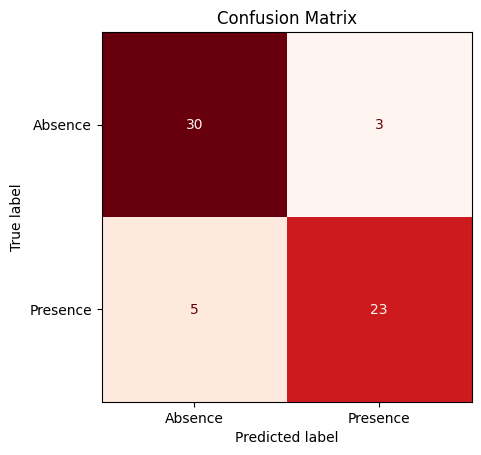

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

sns.reset_defaults()
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=dl, cmap='Reds', colorbar=False)
disp.ax_.set_title('Confusion Matrix')
plt.show()

### Classification report

In [152]:
import pandas as pd

df = pd.read_csv('reports/classification_report.csv')
df

,Unnamed: 0,precision,recall,f1-score,support
0,Absence,0.857143,0.909091,0.882353,33.000000
1,Presence,0.884615,0.821429,0.851852,28.000000
2,accuracy,0.868852,0.868852,0.868852,0.868852
3,macro avg,0.870879,0.865260,0.867102,61.000000
4,weighted avg,0.869753,0.868852,0.868352,61.000000


### Hyperparameter tuning ranks

In [153]:
import pandas as pd

df = pd.read_csv('reports/cv_results.csv')
df = df.sort_values('rank_test_score')
columns = [i.removeprefix('param_') for i in df.columns if 'param_' in i]    
columns.append('rank')
df = pd.DataFrame(df, columns=[i for i in df.columns if 'param_' in i or 'rank' in i])
df.columns = columns
df

,n_estimators,min_samples_split,min_samples_leaf,max_leaf_nodes,max_features,max_depth,rank
3,200,2,5,20.0,sqrt,10.0,1
8,500,5,5,20.0,sqrt,10.0,2
1,200,5,10,10.0,sqrt,10.0,3
7,200,20,10,100.0,sqrt,20.0,4
6,500,5,5,NaN,sqrt,NaN,5
4,200,20,10,NaN,log2,50.0,6
5,50,10,2,100.0,sqrt,50.0,7
0,200,20,5,10.0,sqrt,20.0,8
2,50,20,10,20.0,NaN,50.0,9
9,10,10,5,10.0,NaN,50.0,10


### Full hyperparameter tuning report

In [154]:
import pandas as pd

df = pd.read_csv('reports/cv_results.csv')
df = df.sort_values('rank_test_score')
df

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,3,0.261486,0.023035,0.019908,0.006285,200,2,5,20.0,sqrt,10.0,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.918024,0.837007,0.812744,0.785995,0.812089,0.833172,0.045392,1
8,8,0.603334,0.037196,0.026936,0.001709,500,5,5,20.0,sqrt,10.0,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.897788,0.816786,0.812744,0.785995,0.812745,0.825212,0.037913,2
1,1,0.284534,0.048772,0.020769,0.003793,200,5,10,10.0,sqrt,10.0,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.877036,0.816786,0.812744,0.785995,0.812745,0.821061,0.030065,3
7,7,0.204224,0.011727,0.025385,0.006189,200,20,10,100.0,sqrt,20.0,"{'n_estimators': 200, 'min_samples_split': 20,...",0.897788,0.775510,0.812744,0.785995,0.812745,0.816957,0.043001,4
6,6,0.581651,0.042654,0.028918,0.002305,500,5,5,NaN,sqrt,NaN,"{'n_estimators': 500, 'min_samples_split': 5, ...",0.897788,0.816786,0.792029,0.785995,0.791667,0.816853,0.041841,5
4,4,0.234453,0.010118,0.032120,0.009962,200,20,10,NaN,log2,50.0,"{'n_estimators': 200, 'min_samples_split': 20,...",0.918024,0.775510,0.812744,0.785995,0.791667,0.816788,0.052054,6
5,5,0.074844,0.006109,0.027252,0.015895,50,10,2,100.0,sqrt,50.0,"{'n_estimators': 50, 'min_samples_split': 10, ...",0.918024,0.796259,0.771132,0.785995,0.792029,0.812688,0.053351,7
0,0,0.233971,0.014285,0.025008,0.003913,200,20,5,10.0,sqrt,20.0,"{'n_estimators': 200, 'min_samples_split': 20,...",0.877551,0.796259,0.792029,0.785995,0.771133,0.804593,0.037458,8
2,2,0.071998,0.003323,0.023356,0.002016,50,20,10,20.0,NaN,50.0,"{'n_estimators': 50, 'min_samples_split': 20, ...",0.836048,0.775510,0.812744,0.785995,0.770331,0.796126,0.024751,9
9,9,0.015283,0.000653,0.013243,0.000567,10,10,5,10.0,NaN,50.0,"{'n_estimators': 10, 'min_samples_split': 10, ...",0.816480,0.776072,0.812744,0.762750,0.729521,0.779513,0.032444,10


### Impurity-based feature importance

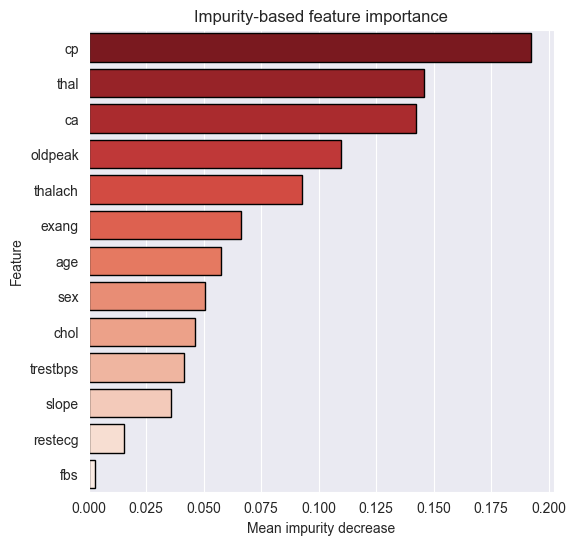

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fi = pd.Series(clf.feature_importances_, index=fn)
fi = fi.sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sns.reset_defaults()
sns.set_style('darkgrid', {'patch.edgecolor':"black", 'patch.linewidth':0.5})
plot = sns.barplot(x=fi.values, y=fi.index, hue=fi.index, palette='Reds_r', color='red')
plot.set_title('Impurity-based feature importance')
plot.set_xlabel('Mean impurity decrease')
plot.set_ylabel('Feature')
plt.show()

### Permutation-based feature importance

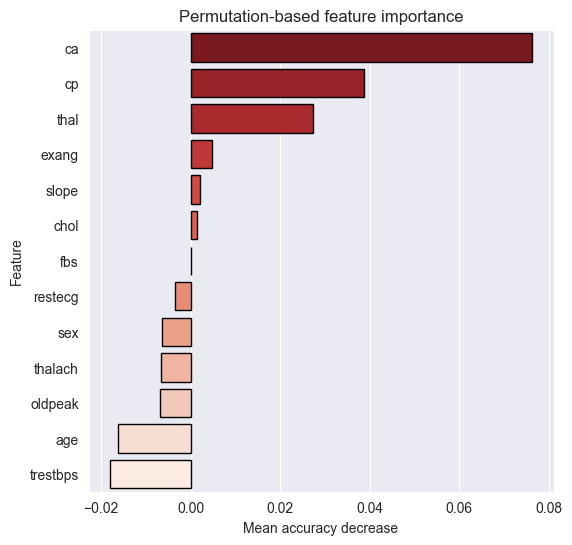

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.inspection import permutation_importance

pi = permutation_importance(clf, X_test, y_test, n_repeats=10, scoring='f1_weighted')
fi = pd.Series(pi.importances_mean, index=fn)
fi = fi.sort_values(ascending=False)
plt.figure(figsize=(6, 6))
sns.reset_defaults()
sns.set_style('darkgrid', {'patch.edgecolor':"black", 'patch.linewidth':0.5})
plot = sns.barplot(x=fi.values, y=fi.index, hue=fi.index, palette='Reds_r')
plot.set_title('Permutation-based feature importance')
plot.set_xlabel('Mean accuracy decrease')
plot.set_ylabel('Feature')
plt.show()